# Pre-Processing & Modeling 

Below I completed the following pre-processing steps:

*Created Target Variable (H Spread Outcome) - Did the home team win, lose, tie the spread?
*Ran Correlation with Actual Home Score Values to determine the most correlated variables to use
*Filtered the variables down to only the most correlated (above .25 correlation score)

*Dropped redudant columns that may overcomplicate the model with the aim of reducing dimensionality (Team name, Year, Date)
*Calculated the difference for each varaible containing stats on the home & away team stats to essentially consoldate the information contain in each teams individual stats - and removed indidual team stats variables.
*Ensured all final training data was only available at the start of each game (exlcuded score)
*Setup Train_Test_Split in prepartion to start modeling. 
*Utilized GridSearch to tune parameters
*Models included: Decision Tree Classifier, Random Forest Classifier, KNN Neighbors, Suport Vector Machines

*I then used the same X variables to instead predict the Winning Team (Home/Away) to compare results with the models mentioned above

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
!pip install pydotplus 
import pydotplus 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Dataset Overview / Remove Null Values 

In [2]:
df2 = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [3]:
df2.shape

(977, 1593)

# Row 0 is the Georgia_Alabama Championship Game and will be used to test model once developed - thus no score entered. 

In [4]:
df2.head()

,Date,Year,Home Team,Home Team Ranking_x,Away Team,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,...,Previous H&A Under Odds_Away_Team,Rolling 5 Past H&A Push Odds_Away_Team,Rolling 5 Past H&A Push Odds Avg_Away_Team,Rolling 5 Past H&A Push Odds Max_Away_Team,Rolling 5 Past H&A Push Odds Min_Away_Team,Rolling 3 Past H&A Push Odds_Away_Team,Rolling 3 Past H&A Push Oddss Avg_Away_Team,Rolling 3 Past H&A Push OddsMax_Away_Team,Rolling 3 Past H&A Push Odds Min_Away_Team,Previous H&A Push Odds_Away_Team
0,2022-01-10,2022,Georgia,3,Alabama,1,-2.5,2.5,52.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-04,2021,Alabama,3,Georgia,1,6.5,-6.5,49.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-11-27,2021,LSU,99,Texas A&M,15,6.5,-6.5,27.0,27.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-11-27,2021,Auburn,99,Alabama,3,19.5,-19.5,55.5,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-11-27,2021,Vanderbilt,99,Tennessee,99,31.5,-31.5,63.5,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df2.describe()

,Year,Home Team Ranking_x,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Away Score_x_x,Rolling 5 Past Away Score,Rolling 5 Past Away Score Avg,...,Previous H&A Under Odds_Away_Team,Rolling 5 Past H&A Push Odds_Away_Team,Rolling 5 Past H&A Push Odds Avg_Away_Team,Rolling 5 Past H&A Push Odds Max_Away_Team,Rolling 5 Past H&A Push Odds Min_Away_Team,Rolling 3 Past H&A Push Odds_Away_Team,Rolling 3 Past H&A Push Oddss Avg_Away_Team,Rolling 3 Past H&A Push OddsMax_Away_Team,Rolling 3 Past H&A Push Odds Min_Away_Team,Previous H&A Push Odds_Away_Team
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,976.000000,976.000000,907.000000,907.000000,...,970.000000,942.000000,942.000000,942.000000,942.0,956.000000,956.000000,956.000000,956.0,970.000000
mean,2012.903787,58.841351,57.990788,-2.826510,2.826510,51.393040,26.869877,24.196721,120.943771,24.188754,...,0.528866,0.055202,0.011040,0.055202,0.0,0.031381,0.010460,0.031381,0.0,0.008247
std,5.187959,44.375891,44.404771,13.250883,13.250883,8.025355,13.421241,13.896771,42.124725,8.424945,...,0.499424,0.228495,0.045699,0.228495,0.0,0.174436,0.058145,0.174436,0.0,0.090487
min,2004.000000,1.000000,1.000000,-41.500000,-36.000000,27.000000,0.000000,0.000000,28.000000,5.600000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,2008.000000,11.000000,11.000000,-12.500000,-6.500000,45.500000,17.000000,14.000000,92.000000,18.400000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,2013.000000,99.000000,99.000000,-3.000000,3.000000,50.500000,26.000000,23.000000,117.000000,23.400000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,2017.000000,99.000000,99.000000,6.500000,12.500000,56.000000,37.000000,34.000000,147.000000,29.400000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
max,2022.000000,99.000000,99.000000,36.000000,41.500000,82.500000,74.000000,72.000000,278.000000,55.600000,...,1.000000,1.000000,0.200000,1.000000,0.0,1.000000,0.333333,1.000000,0.0,1.000000


In [6]:
Prediction_Game = df2.loc[0]

In [7]:
Prediction_Game

Date                                           2022-01-10 00:00:00
Year                                                          2022
Home Team                                                  Georgia
Home Team Ranking_x                                              3
Away Team                                                  Alabama
                                                      ...         
Rolling 3 Past H&A Push Odds_Away_Team                         0.0
Rolling 3 Past H&A Push Oddss Avg_Away_Team                    0.0
Rolling 3 Past H&A Push OddsMax_Away_Team                      0.0
Rolling 3 Past H&A Push Odds Min_Away_Team                     0.0
Previous H&A Push Odds_Away_Team                               0.0
Name: 0, Length: 1593, dtype: object

In [8]:
df3= df2[1:]

In [9]:
df3.shape

(976, 1593)

# Created Target Variable

In [11]:
df3['H Spread Outcome'] = df3.apply(lambda x: 'H_Spread_W' if (x['Home Score_x_x'] + x['Home Team Spread_x']) > x['Away Score_x_x'] 
                                  else ('H_Spread_L' if (x['Home Score_x_x'] + x['Home Team Spread_x']) < x['Away Score_x_x']
                                  else 'H_Spread_W' if x['Home Score_x_x'] + x['Home Team Spread_x'] == x['Away Score_x_x']
                                  else ""
                                       
                                       
                                       
                                       ),axis=1) 
#If there is a tie - I labeled as Win as bets would be refunded (It accounted for less than 3% of games)

<ipython-input-11-411cdcf0964b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['H Spread Outcome'] = df3.apply(lambda x: 'H_Spread_W' if (x['Home Score_x_x'] + x['Home Team Spread_x']) > x['Away Score_x_x']


In [14]:
df3['H Spread Outcome'].value_counts()

H_Spread_W    492
H_Spread_L    484
Name: H Spread Outcome, dtype: int64

In [12]:
484/976 #Home Spread Loss %

0.4959016393442623

In [16]:
492/976 #Home Spread Win %

0.5040983606557377

In [17]:
28/976 #Home Spread Push(tie) %

0.028688524590163935

# Correlation Tests

In [18]:
# As the home and away team scores of the game determine whether or not the home team wins or losses the spread , I ran a correlation test to determine which variables are most correlated with the scores - which will be used in the final model. 



In [19]:
df3.dtypes

Date                                           datetime64[ns]
Year                                                    int64
Home Team                                              object
Home Team Ranking_x                                     int64
Away Team                                              object
                                                    ...      
Rolling 3 Past H&A Push Oddss Avg_Away_Team           float64
Rolling 3 Past H&A Push OddsMax_Away_Team             float64
Rolling 3 Past H&A Push Odds Min_Away_Team            float64
Previous H&A Push Odds_Away_Team                      float64
H Spread Outcome                                       object
Length: 1594, dtype: object

In [20]:
columns_list=df3.columns


In [21]:
Prediction_Variable = df3['Home Score_x_x']
Home_High_Corr_Values = []

In [22]:
for i in columns_list:
     if df3[i].dtypes == 'float64':
        corr = df3[i].corr(Prediction_Variable) 
        print(i,":",corr)
        if corr > .3:
            Home_High_Corr_Values.append(i)
        if corr < -.3:
            Home_High_Corr_Values.append(i)

Home Team Spread_x : -0.4705450569905662
Away Team Spread_x : 0.4705450569905662
Total_x : 0.3223280984872463
Home Score_x_x : 1.0
Away Score_x_x : -0.06515300572081069
Rolling 5 Past Away Score : -0.10797820700921772
Rolling 5 Past Away Score Avg : -0.10797820700921767
Rolling 5 Past Away Score Max : -0.05625579841822005
Rolling 5 Past Away Score Min : -0.08960629256777507
Rolling 3 Past Away Score : -0.09416260693057879
Rolling 3 Past Away Score Avg : -0.09416260693057875
Rolling 3 Past Away Score Max : -0.055792149105279285
Rolling 3 Past Away Score Min : -0.07453356827482498
Past Away Score : -0.07097380100304561
Rolling 5 Past Away HI Pass yrds : 0.06730476047881796
Rolling 5 Past Away HI Pass yrds Avg : 0.06730476047881793
Rolling 5 Past Away HI Pass yrds Max : 0.10315211853874473
Rolling 5 Past Away HI Pass yrds Min : 0.024423690098601042
Rolling 3 Past Away HI Pass yrds : 0.08224198660280532
Rolling 3 Past Away HI Pass yrds Avg : 0.08224198660280536
Rolling 3 Past Away HI Pass 

Rolling 3 Past Away Yards per Penalty Avg : 0.1298039667168182
Rolling 3 Past Away Yards per Penalty Max : 0.13112511982738928
Rolling 3 Past Away Yards per Penalty Min : 0.08157554668886413
Previous Away Yards per Penalty : 0.06452501774548179
Rolling 5 Past Away Turnovers : 0.10868157597267046
Rolling 5 Past Away Turnovers Avg : 0.10868157597267045
Rolling 5 Past Away Turnovers Max : 0.10261800525571252
Rolling 5 Past Away Turnovers Min : 0.0817215176237875
Rolling 3 Past Away Turnovers : 0.10131654473492079
Rolling 3 Past Away Turnovers Avg : 0.10131654473492074
Rolling 3 Past Away Turnovers Max : 0.09671144106425474
Rolling 3 Past Away Turnovers Min : 0.06465863130872393
Previous Away Turnovers : 0.060502399508724124
Rolling 5 Past Away Fumbles Lost : 0.06761834738698372
Rolling 5 Past Away Fumbles Lost Avg : 0.06761834738698376
Rolling 5 Past Away Fumbles Lost Max : 0.03209347139956248
Rolling 5 Past Away Fumbles Lost Min : 0.07516428984730854
Rolling 3 Past Away Fumbles Lost : 0.

Previous Home HI Pass yrds : 0.1850363680509152
Rolling 5 Past Home HI Rush yrds : 0.0857587368980979
Rolling 5 Past Home HI Rush yrds Avg : 0.0857587368980979
Rolling 5 Past Home HI Rush yrds Max : 0.044458959330495415
Rolling 5 Past Home HI Rush yrds Min : 0.10533718344968157
Rolling 3 Past Home HI Rush yrds : 0.08391846529159416
Rolling 3 Past Home HI Rush yrds Avg : 0.08391846529159419
Rolling 3 Past Home HI Rush yrds Max : 0.03439451860325003
Rolling 3 Past Home HI Rush yrds Min : 0.11025925252512128
Previous Home HI Rush yrds : 0.06726646056009991
Rolling 5 Past Home HI REC yrds : 0.23855039516895468
Rolling 5 Past Home HI REC yrds Avg : 0.2385503951689546
Rolling 5 Past Home HI REC yrds Max : 0.1688364418831364
Rolling 5 Past Home HI REC yrds Min : 0.24315024115913045
Rolling 3 Past Home HI REC yrds : 0.22651538090809112
Rolling 3 Past Home HI REC yrds Avg : 0.22651538090809106
Rolling 3 Past Home HI REC yrds Max : 0.1862942268127767
Rolling 3 Past Home HI REC yrds Min : 0.21414

Rolling 3 Past Home Penalty Yards Avg : 0.09175550995113547
Rolling 3 Past Home Penalty Yards Max : 0.09336708111129632
Rolling 3 Past Home Penalty Yards Min : 0.03874205604403175
Previous Home Penalty Yards : 0.08127610045001993
Rolling 5 Past Home Yards per Penalty : 0.07430286444884789
Rolling 5 Past Home Yards per Penalty Avg : 0.07430286444884777
Rolling 5 Past Home Yards per Penalty Max : 0.06390876295268083
Rolling 5 Past Home Yards per Penalty Min : 0.03566366611261253
Rolling 3 Past Home Yards per Penalty : 0.07606841828378935
Rolling 3 Past Home Yards per Penalty Avg : 0.07606841828378937
Rolling 3 Past Home Yards per Penalty Max : 0.07563733024097041
Rolling 3 Past Home Yards per Penalty Min : 0.052107298429830515
Previous Home Yards per Penalty : 0.09283838887121013
Rolling 5 Past Home Turnovers : -0.051226529426682016
Rolling 5 Past Home Turnovers Avg : -0.051226529426682064
Rolling 5 Past Home Turnovers Max : -0.0754834550646148
Rolling 5 Past Home Turnovers Min : -0.0590

Rolling 3 Past Home Push OddsMax : 0.055412649648635216
Rolling 3 Past Home Push Odds Min : nan
Previous Home Push Odds : -0.004435277839012953
Rolling 5 Past Home Passing : 0.24099890964434206
Rolling 5 Past Home Passing Avg : 0.24099890964434198
Rolling 5 Past Home Passing Max : 0.18778145855979975
Rolling 5 Past Home Passing Min : 0.21865458920999153
Rolling 3 Past Home Passing : 0.2212457836160942
Rolling 3 Past Home Passing Avg : 0.22124578361609415
Rolling 3 Past Home Passing Max : 0.19679976458396153
Rolling 3 Past Home Passing Min : 0.19693593252667382
Rolling 5 Past H&A Score_Home_Team : 0.3344825115215135
Rolling 5 Past H&A Score Avg_Home_Team : 0.33448251152151354
Rolling 5 Past H&A Score Max_Home_Team : 0.2807449367286208
Rolling 5 Past H&A Score Min_Home_Team : 0.2731018043420944
Rolling 3 Past H&A Score_Home_Team : 0.29445679427065563
Rolling 3 Past H&A Score Avg_Home_Team : 0.2944567942706558
Rolling 3 Past H&A Score Max_Home_Team : 0.27231054600341037
Rolling 3 Past H&A

Rolling 5 Past H&A Rushing Max_Home_Team : 0.12451127200918062
Rolling 5 Past H&A Rushing Min_Home_Team : 0.148955094706232
Rolling 3 Past H&A Rushing_Home_Team : 0.16737129262554695
Rolling 3 Past H&A Rushing Avg_Home_Team : 0.16737129262554695
Rolling 3 Past H&A Rushing Max_Home_Team : 0.1331188061510166
Rolling 3 Past H&A Rushing Min_Home_Team : 0.12623275668638095
Previous H&A Rushing_Home_Team : 0.14134064302646346
Rolling 5 Past H&A Rushing Attempts_Home_Team : 0.10624038580360286
Rolling 5 Past H&A Rushing Attempts Avg_Home_Team : 0.10624038580360293
Rolling 5 Past H&A Rushing Attempts Max_Home_Team : 0.06622448377837445
Rolling 5 Past H&A Rushing Attempts Min_Home_Team : 0.07453481092958156
Rolling 3 Past H&A Rushing Attempts_Home_Team : 0.08659756423348702
Rolling 3 Past H&A Rushing Attempts Avg_Home_Team : 0.08659756423348691
Rolling 3 Past H&A Rushing Attempts Max_Home_Team : 0.046116253232290995
Rolling 3 Past H&A Rushing Attempts Min_Home_Team : 0.08466467138811688
Previou

Rolling 5 Past H&A Over Odds Max_Home_Team : 0.023027243908364102
Rolling 5 Past H&A Over Odds Min_Home_Team : 0.05123757381196508
Rolling 3 Past H&A Over Odds_Home_Team : 0.05639697183991152
Rolling 3 Past H&A Over Oddss Avg_Home_Team : 0.056396971839911554
Rolling 3 Past H&A Over OddsMax_Home_Team : 0.03857034031575381
Rolling 3 Past H&A Over Odds Min_Home_Team : 0.06680385145969721
Previous H&A Over Odds_Home_Team : 0.05762899970241032
Rolling 5 Past H&A Under Odds_Home_Team : -0.08206444367731985
Rolling 5 Past H&A Under Odds Avg_Home_Team : -0.08206444367731976
Rolling 5 Past H&A Under Odds Max_Home_Team : -0.051237573811965094
Rolling 5 Past H&A Under Odds Min_Home_Team : -0.03443137400602484
Rolling 3 Past H&A Under Odds_Home_Team : -0.06673603261420812
Rolling 3 Past H&A Under Oddss Avg_Home_Team : -0.06673603261420796
Rolling 3 Past H&A Under OddsMax_Home_Team : -0.057882367122616456
Rolling 3 Past H&A Under Odds Min_Home_Team : -0.05450246305297178
Previous H&A Under Odds_Hom

Rolling 3 Past H&A Total Yards Avg_Away_Team : -0.017462453247599125
Rolling 3 Past H&A Total Yards Max_Away_Team : 0.007555642474832824
Rolling 3 Past H&A Total Yards Min_Away_Team : -0.027213818029348476
Previous H&A Total Yards_Away_Team : -0.02207983897379332
Rolling 5 Past H&A Passing_Away_Team : 0.06121708250296727
Rolling 5 Past H&A Passing Avg_Away_Team : 0.06121708250296729
Rolling 5 Past H&A Passing Max_Away_Team : 0.07411582325167548
Rolling 5 Past H&A Passing Min_Away_Team : 0.04003039440377597
Rolling 3 Past H&A Passing_Away_Team : 0.04225493631366825
Rolling 3 Past H&A Passing Avg_Away_Team : 0.042254936313668286
Rolling 3 Past H&A Passing Max_Away_Team : 0.03829466476858401
Rolling 3 Past H&A Passing Min_Away_Team : 0.037104228341031074
Previous H&A Passing_Away_Team : 0.02520277889424112
Rolling 5 Past H&A Yards per Pass_Away_Team : -0.08239669366734091
Rolling 5 Past H&A Yards per Pass Avg_Away_Team : -0.08239669366734097
Rolling 5 Past H&A Yards per Pass Max_Away_Team

Rolling 5 Past H&A ATS Win_Away_Team : -0.0006493285198369808
Rolling 5 Past H&A ATS Win Avg_Away_Team : -0.00064932851983699
Rolling 5 Past H&A ATS Win Max_Away_Team : 0.019510146811826775
Rolling 5 Past H&A ATS Win Min_Away_Team : -0.015993478270889337
Rolling 3 Past H&A ATS Win_Away_Team : 0.022933149611702924
Rolling 3 Past H&A ATS Win Avg_Away_Team : 0.022933149611702862
Rolling 3 Past H&A ATS Win Max_Away_Team : 0.012637630726360838
Rolling 3 Past H&A ATS Win Min_Away_Team : 0.02429568441922435
Previous H&A ATS Win_Away_Team : 0.037199823128252575
Rolling 5 Past H&A ATS Loss_Away_Team : 0.010709434176209181
Rolling 5 Past H&A ATS Loss Avg_Away_Team : 0.010709434176209173
Rolling 5 Past H&A ATS Loss Max_Away_Team : 0.021766562751244303
Rolling 5 Past H&A ATS Loss Min_Away_Team : -0.04108592366815491
Rolling 3 Past H&A ATS Loss_Away_Team : -0.015818992692231172
Rolling 3 Past H&A ATS Loss Avg_Away_Team : -0.015818992692231155
Rolling 3 Past H&A ATS Loss Max_Away_Team : -0.030342275

In [23]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team']

In [ ]:
#I removed some of the redundant variables where there was an avg over past 5 games as well as a 5 game rolling total
#I also added some of the variables with slighlty less values than .3 given I felt they should be included as well

In [26]:
Home_High_Corr_Values.remove('Rolling 5 Past H&A Score_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A 1st Downs_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Total Yards_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Yards per Pass_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Spread_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A HI REC yrds Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Conf T Wins_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Completion % Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Q1 Score Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Ranking Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Season T Losses_Away_Team')

ValueError: list.remove(x): x not in list

In [27]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
 'Rolling 5 Past H&A Conf T Wins_Home_Team',
 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
 'Rolling 5 Past H&A Completion % Avg_Home_Team',
 'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
 'Rolling 5 Past H&A Ranking Avg_Home_Team',
 'Rolling 5 Past H&A Season T Losses_Away_Team']

In [ ]:
# I added the same stats for the away team, given whether or not the home team wins or loses the spread will also depend on the away teams stats/scores

In [28]:
Home_High_Corr_Values.append('Away Score_x_x')
Home_High_Corr_Values.append('Rolling 5 Past H&A Score Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 1st Downs Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Total Yards Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Yards per Pass Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Spread Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Spread Min_Away_Team')

Home_High_Corr_Values.append('Rolling 5 Past H&A HI REC yrds Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Conf T Wins_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Completion % Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Q1 Score Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Ranking Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Season T Losses_Home_Team')

Home_High_Corr_Values.append('Home Team Ranking_x')
Home_High_Corr_Values.append('Away Team Ranking_x')
Home_High_Corr_Values.append('Previous H&A Ranking_Home_Team')
Home_High_Corr_Values.append('Previous H&A Ranking_Away_Team')
Home_High_Corr_Values.append('H Spread Outcome')
Home_High_Corr_Values.append('Date')
Home_High_Corr_Values.append('Home Team')
Home_High_Corr_Values.append('Away Team')
Home_High_Corr_Values.append('Year')

In [29]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
 'Rolling 5 Past H&A Conf T Wins_Home_Team',
 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
 'Rolling 5 Past H&A Completion % Avg_Home_Team',
 'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
 'Rolling 5 Past H&A Ranking Avg_Home_Team',
 'Rolling 5 Past H&A Season T Losses_Away_Team',
 'Away Score_x_x',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
 'Rolling 5 Past H&A Spread Avg_Away_Team',
 'Rolling 5 Past H&A Spread Min_Away_Team',
 'R

In [30]:
df4 = df3[Home_High_Corr_Values]

In [31]:
df4.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Rolling 5 Past H&A Season T Losses_Home_Team,Home Team Ranking_x,Away Team Ranking_x,Previous H&A Ranking_Home_Team,Previous H&A Ranking_Away_Team,H Spread Outcome,Date,Home Team,Away Team,Year
1,6.5,-6.5,49.0,41.0,37.4,23.6,496.8,9.86,-22.3,-29.0,...,5.0,3,1,3.0,1.0,H_Spread_W,2021-12-04,Alabama,Georgia,2021
2,6.5,-6.5,27.0,27.0,22.8,20.0,358.2,6.18,11.1,2.0,...,21.0,99,15,99.0,11.0,H_Spread_W,2021-11-27,LSU,Texas A&M,2021
3,19.5,-19.5,55.5,22.0,24.6,22.2,399.6,7.70,-1.3,-7.0,...,16.0,99,3,99.0,1.0,H_Spread_W,2021-11-27,Auburn,Alabama,2021
4,31.5,-31.5,63.5,21.0,17.6,16.2,313.8,6.28,22.5,16.0,...,35.0,99,99,99.0,99.0,H_Spread_W,2021-11-27,Vanderbilt,Tennessee,2021
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,15.0,25,99,21.0,99.0,H_Spread_W,2021-11-26,Arkansas,Missouri,2021


In [ ]:
#I removed Home Team & Away Team, Date, Year, as I wanted the model to focus it's prediction on the stats as opposed to team and date info.

In [32]:
df4 = df4.drop('Home Team', axis=1)
df4 = df4.drop('Away Team', axis=1)
df4 = df4.drop('Year', axis=1)
df4 = df4.drop('Date', axis=1)

In [33]:
df4 = df4.drop('Away Team Spread_x', axis=1) #also a redudant variable as it is the opposite of the home spread

In [ ]:
#To reduce dimensionality, I took the differences between the home stats and away stats, which cut the columns nearly in half

In [34]:
df4['Rolling_5_Game_Score_Avg_Diff'] = df4['Rolling 5 Past H&A Score Avg_Away_Team'] - df4['Rolling 5 Past H&A Score Avg_Home_Team']

df4['Rolling_5_Game_1stDowns_Avg_Diff'] = df4['Rolling 5 Past H&A 1st Downs Avg_Away_Team'] - df4['Rolling 5 Past H&A 1st Downs Avg_Home_Team']

df4['Rolling_5_Game_Total_Yards_Avg_Diff'] = df4['Rolling 5 Past H&A Total Yards Avg_Away_Team'] - df4['Rolling 5 Past H&A Total Yards Avg_Home_Team']

df4['Rolling_5_Game_YardsperPass_Avg_Diff'] = df4['Rolling 5 Past H&A Yards per Pass Avg_Away_Team'] - df4['Rolling 5 Past H&A Yards per Pass Avg_Home_Team']

df4['Rolling_5_Game_Spread_Avg_Diff'] = df4['Rolling 5 Past H&A Spread Avg_Away_Team'] - df4['Rolling 5 Past H&A Spread Avg_Home_Team']

df4['Rolling_5_Game_Conf_Wins_Diff'] = df4['Rolling 5 Past H&A Conf T Wins_Away_Team'] - df4['Rolling 5 Past H&A Conf T Wins_Home_Team']

df4['Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff'] = df4['Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team'] - df4['Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team']

df4['Rolling_5_Game_Completion%_Avg_Diff'] = df4['Rolling 5 Past H&A Completion % Avg_Away_Team'] - df4['Rolling 5 Past H&A Completion % Avg_Home_Team']

df4['Rolling_5_Game_Ranking_Avg_Diff'] = df4['Rolling 5 Past H&A Ranking Avg_Away_Team'] - df4['Rolling 5 Past H&A Ranking Avg_Home_Team']




In [35]:
df4.columns

Index(['Home Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'R

In [40]:
Model_cols = ['Home Team Spread_x',
               'Total_x',
               'Rolling_5_Game_Score_Avg_Diff',
               'Rolling_5_Game_1stDowns_Avg_Diff',
               'Rolling_5_Game_Total_Yards_Avg_Diff',
               'Rolling_5_Game_YardsperPass_Avg_Diff',
               'Rolling_5_Game_Spread_Avg_Diff',
               'Rolling_5_Game_Conf_Wins_Diff',
               'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff',
               'Rolling_5_Game_Completion%_Avg_Diff',
               'Rolling_5_Game_Ranking_Avg_Diff',
               'Away Team Ranking_x',
               'Home Team Ranking_x',
               'H Spread Outcome'
               ]

In [41]:
df4= df4[Model_cols]

In [42]:
df4.head()

,Home Team Spread_x,Total_x,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,Away Team Ranking_x,Home Team Ranking_x,H Spread Outcome
1,6.5,49.0,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8,1,3,H_Spread_W
2,6.5,27.0,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6,15,99,H_Spread_W
3,19.5,55.5,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4,3,99,H_Spread_W
4,31.5,63.5,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0,99,99,H_Spread_W
5,-14.5,63.0,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2,99,25,H_Spread_W


In [43]:
df4.shape

(976, 14)

In [44]:
df4.isnull().sum()

Home Team Spread_x                               0
Total_x                                          0
Rolling_5_Game_Score_Avg_Diff                   38
Rolling_5_Game_1stDowns_Avg_Diff                48
Rolling_5_Game_Total_Yards_Avg_Diff             48
Rolling_5_Game_YardsperPass_Avg_Diff            48
Rolling_5_Game_Spread_Avg_Diff                  38
Rolling_5_Game_Conf_Wins_Diff                   38
Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff    48
Rolling_5_Game_Completion%_Avg_Diff             48
Rolling_5_Game_Ranking_Avg_Diff                 38
Away Team Ranking_x                              0
Home Team Ranking_x                              0
H Spread Outcome                                 0
dtype: int64

In [29]:
#Removed all rows with null values 

In [45]:
df4 = df4.dropna()

In [46]:
df4.shape

(928, 14)

In [47]:
#Removing rows with null values took the dataset from 976 rows to 928. 

In [48]:
df4.isnull().sum().max()

0

In [49]:
df4['H Spread Outcome'].value_counts()

H_Spread_W    469
H_Spread_L    459
Name: H Spread Outcome, dtype: int64

In [50]:
print('Home Spread Loss %: ',459/928 , '\n' 'Home Spread Win %: ', 469/928 )

Home Spread Loss %:  0.49461206896551724 
Home Spread Win %:  0.5053879310344828


In [61]:
df4.describe()

,Home Team Spread_x,Total_x,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,Away Team Ranking_x,Home Team Ranking_x
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,-2.789332,51.568966,0.111853,0.074784,0.961638,0.026444,-0.667457,0.189655,0.002205,-0.000211,0.974138,57.703664,58.510776
std,13.285394,8.111918,11.401812,4.622907,97.293550,2.013701,12.790740,9.718399,0.108985,0.091329,56.631580,44.457214,44.433919
min,-41.500000,27.000000,-34.600000,-14.800000,-326.800000,-7.680000,-41.500000,-29.000000,-0.383333,-0.315362,-98.000000,1.000000,1.000000
25%,-12.500000,45.500000,-7.400000,-3.000000,-61.050000,-1.340000,-9.600000,-6.000000,-0.067535,-0.056032,-41.600000,10.000000,10.000000
50%,-3.000000,50.500000,0.000000,0.400000,1.000000,0.060000,-0.850000,1.000000,0.000010,-0.002075,0.000000,99.000000,99.000000
75%,6.500000,56.500000,7.850000,3.200000,68.200000,1.300000,8.425000,7.000000,0.071781,0.063083,45.050000,99.000000,99.000000
max,36.000000,82.500000,38.400000,14.000000,347.200000,6.500000,40.600000,29.000000,0.313750,0.271826,98.000000,99.000000,99.000000


# Test Train Spit

In [207]:
X = df4.drop('H Spread Outcome',axis=1)
# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [219]:
X.columns

Index(['Home Team Spread_x', 'Total_x', 'Rolling_5_Game_Score_Avg_Diff',
       'Rolling_5_Game_1stDowns_Avg_Diff',
       'Rolling_5_Game_Total_Yards_Avg_Diff',
       'Rolling_5_Game_YardsperPass_Avg_Diff',
       'Rolling_5_Game_Spread_Avg_Diff', 'Rolling_5_Game_Conf_Wins_Diff',
       'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff',
       'Rolling_5_Game_Completion%_Avg_Diff',
       'Rolling_5_Game_Ranking_Avg_Diff', 'Away Team Ranking_x',
       'Home Team Ranking_x'],
      dtype='object')

In [208]:
X_train.shape

(696, 13)

In [209]:
y_train.shape

(696,)

In [210]:
X_test.shape

(232, 13)

In [211]:
y_test.shape

(232,)

# Home Spread Win/Loss Modeling

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Decision Tree

In [213]:
DT = DecisionTreeClassifier()

In [214]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [215]:
y_pred = DT.predict(X_test)

In [216]:
metrics.accuracy_score(y_test, y_pred)

0.521551724137931

In [217]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.541     0.492     0.515       120
  H_Spread_W      0.504     0.554     0.528       112

    accuracy                          0.522       232
   macro avg      0.523     0.523     0.521       232
weighted avg      0.523     0.522     0.521       232



In [218]:
DT.max_features_

13

In [203]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

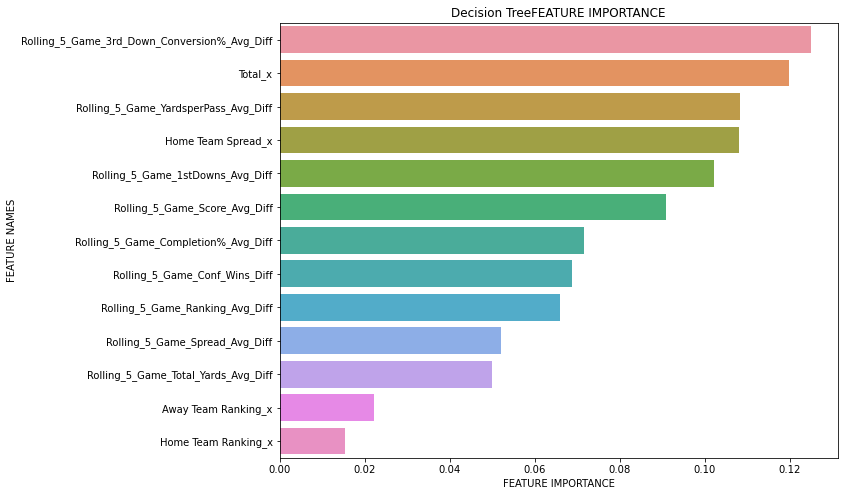

In [204]:
plot_feature_importance(DT.feature_importances_,X_train.columns,'Decision Tree')

In [205]:
from sklearn.tree import plot_tree, export_text

[Text(2604.0, 978.48, 'Rolling_5_Game_Total_Yards_Avg_Diff <= 73.4\ngini = 0.5\nsamples = 696\nvalue = [339, 357]'),
 Text(1594.2857142857144, 761.0400000000001, 'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff <= -0.001\ngini = 0.499\nsamples = 524\nvalue = [273, 251]'),
 Text(850.2857142857143, 543.6, 'Home Team Spread_x <= -16.0\ngini = 0.498\nsamples = 317\nvalue = [148, 169]'),
 Text(425.14285714285717, 326.1600000000001, 'Rolling_5_Game_Spread_Avg_Diff <= 12.2\ngini = 0.483\nsamples = 81\nvalue = [48, 33]'),
 Text(212.57142857142858, 108.72000000000003, '\n  (...)  \n'),
 Text(637.7142857142858, 108.72000000000003, '\n  (...)  \n'),
 Text(1275.4285714285716, 326.1600000000001, 'Rolling_5_Game_Completion%_Avg_Diff <= 0.061\ngini = 0.488\nsamples = 236\nvalue = [100, 136]'),
 Text(1062.857142857143, 108.72000000000003, '\n  (...)  \n'),
 Text(1488.0, 108.72000000000003, '\n  (...)  \n'),
 Text(2338.285714285714, 543.6, 'Total_x <= 70.0\ngini = 0.478\nsamples = 207\nvalue = [125, 82]')

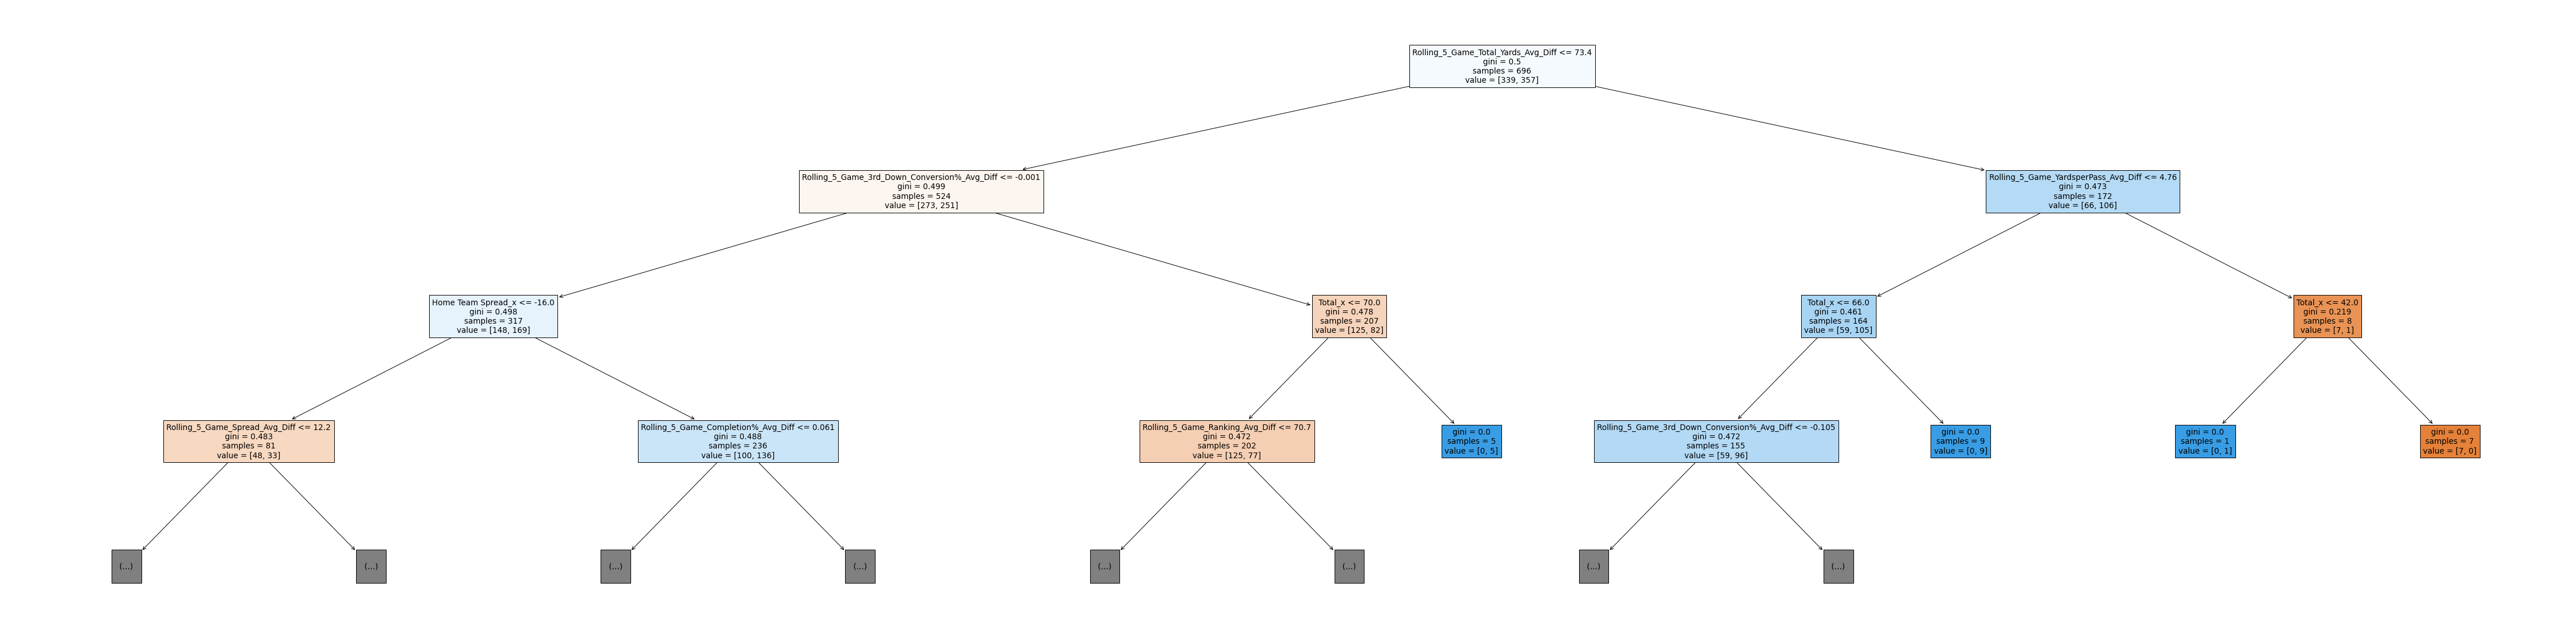

In [206]:
plt.figure(figsize=(80,20))
plot_tree(DT,feature_names=X_train.columns,max_depth=3,filled=True)

# Decision Tree GridSearch

In [182]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,3,5,10],
    'max_features' : [5,6,7,8,9,10,11,12,13]
}

In [183]:
DT2 = DecisionTreeClassifier()

In [184]:
clf = GridSearchCV(DT2,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']})

In [185]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'splitter': 'best'}

In [186]:
best_params = clf.best_params_

In [187]:

DT = DecisionTreeClassifier(**best_params)


In [188]:
DT2.fit(X_train,y_train)

DecisionTreeClassifier()

In [189]:
y_pred = DT2.predict(X_test)

In [190]:
metrics.accuracy_score(y_test, y_pred)

0.5301724137931034

In [191]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.546     0.542     0.544       120
  H_Spread_W      0.513     0.518     0.516       112

    accuracy                          0.530       232
   macro avg      0.530     0.530     0.530       232
weighted avg      0.530     0.530     0.530       232



[Text(2604.0, 978.48, 'Rolling_5_Game_Total_Yards_Avg_Diff <= 73.4\ngini = 0.5\nsamples = 696\nvalue = [339, 357]'),
 Text(1594.2857142857144, 761.0400000000001, 'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff <= -0.001\ngini = 0.499\nsamples = 524\nvalue = [273, 251]'),
 Text(850.2857142857143, 543.6, 'Home Team Spread_x <= -16.0\ngini = 0.498\nsamples = 317\nvalue = [148, 169]'),
 Text(425.14285714285717, 326.1600000000001, 'Rolling_5_Game_Spread_Avg_Diff <= 12.2\ngini = 0.483\nsamples = 81\nvalue = [48, 33]'),
 Text(212.57142857142858, 108.72000000000003, '\n  (...)  \n'),
 Text(637.7142857142858, 108.72000000000003, '\n  (...)  \n'),
 Text(1275.4285714285716, 326.1600000000001, 'Rolling_5_Game_Completion%_Avg_Diff <= 0.061\ngini = 0.488\nsamples = 236\nvalue = [100, 136]'),
 Text(1062.857142857143, 108.72000000000003, '\n  (...)  \n'),
 Text(1488.0, 108.72000000000003, '\n  (...)  \n'),
 Text(2338.285714285714, 543.6, 'Total_x <= 70.0\ngini = 0.478\nsamples = 207\nvalue = [125, 82]')

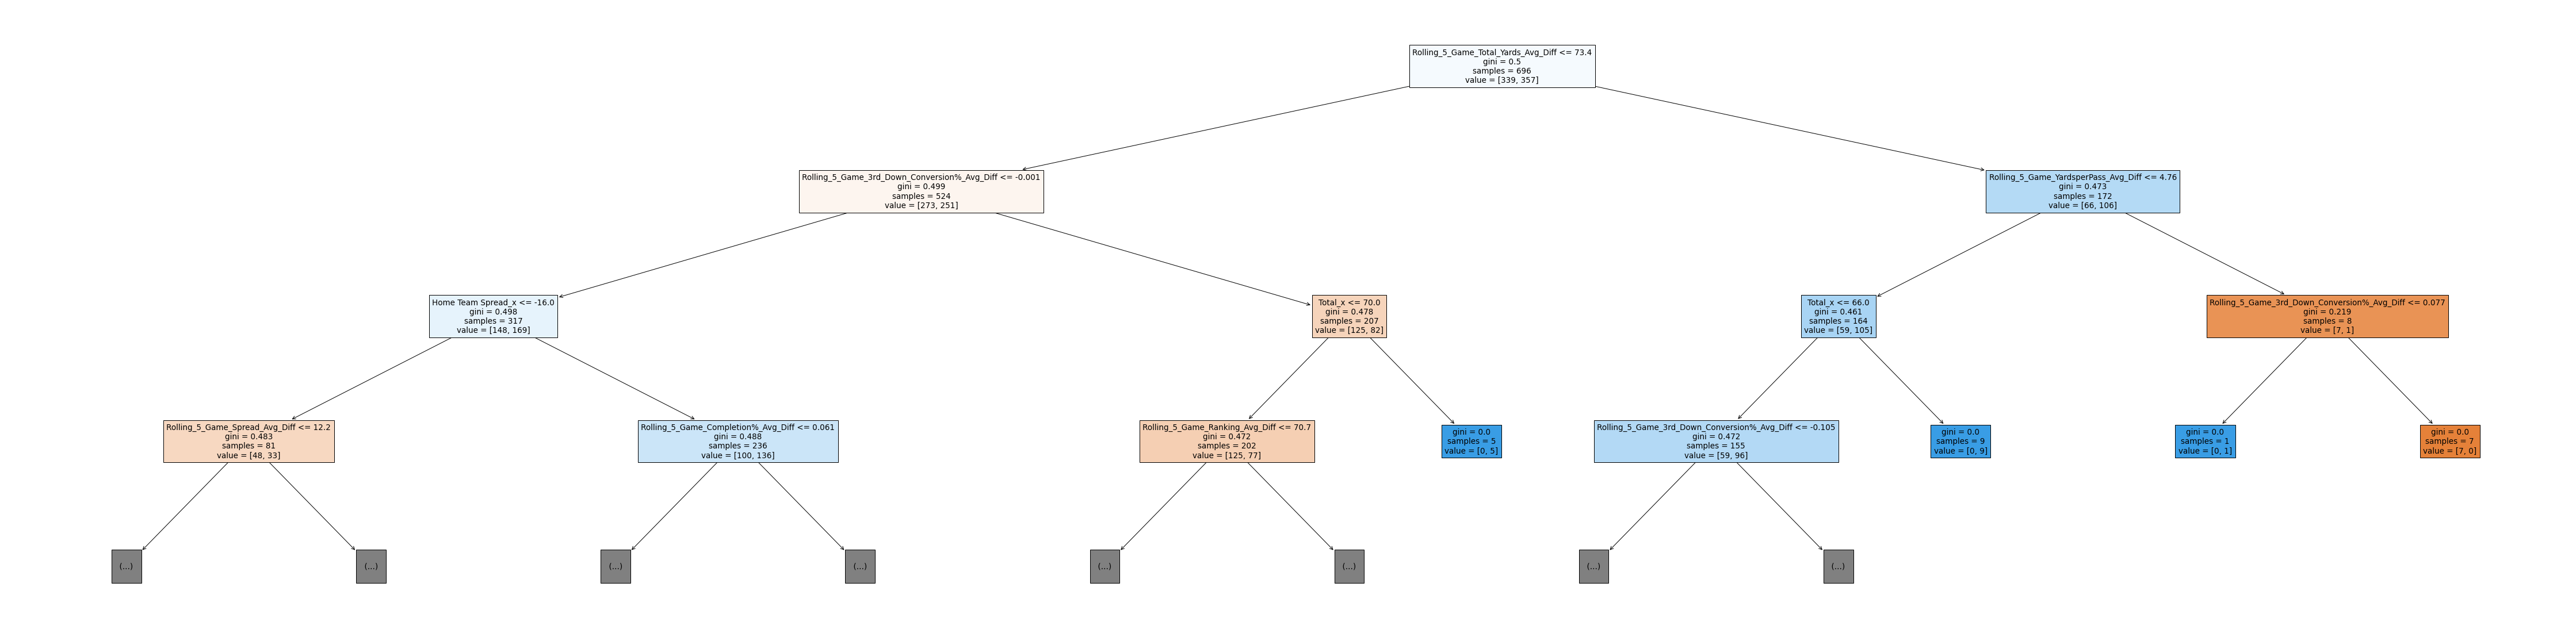

In [194]:
plt.figure(figsize=(80,20))
plot_tree(DT2,feature_names=X_train.columns,max_depth=3,filled=True)

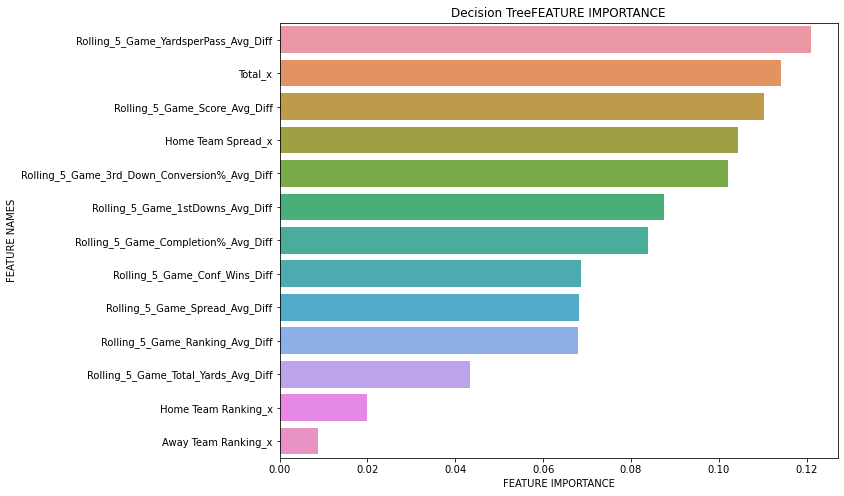

In [195]:
plot_feature_importance(DT2.feature_importances_,X_train.columns,'Decision Tree')

# Random Forrest 

In [151]:
RF = RandomForestClassifier()

In [152]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
y_pred = RF.predict(X_test)

In [154]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.529     0.458     0.491       120
  H_Spread_W      0.492     0.562     0.525       112

    accuracy                          0.509       232
   macro avg      0.511     0.510     0.508       232
weighted avg      0.511     0.509     0.507       232



# Random Forest GridSearch

In [104]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [3,4,5,10,13],
    'min_samples_split':[5,10,15],
    'min_samples_leaf': [3,10,20],
    'max_leaf_nodes': [20,30,50]
    
}

In [105]:
RF = RandomForestClassifier()

In [106]:
clf = GridSearchCV(RF,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 10, 13],
                         'max_leaf_nodes': [20, 30, 50],
                         'min_samples_leaf': [3, 10, 20],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 150]})

In [107]:
best_param= clf.best_params_

In [108]:
best_param

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [120]:
RF1 = RandomForestClassifier()

In [121]:
RF1.set_params(**best_param)

RandomForestClassifier(max_depth=5, max_leaf_nodes=30, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)

In [122]:
RF1.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=30, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)

In [123]:
y_pred=RF1.predict(X_test)

In [124]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.515     0.417     0.461       120
  H_Spread_W      0.481     0.580     0.526       112

    accuracy                          0.496       232
   macro avg      0.498     0.499     0.494       232
weighted avg      0.499     0.496     0.492       232



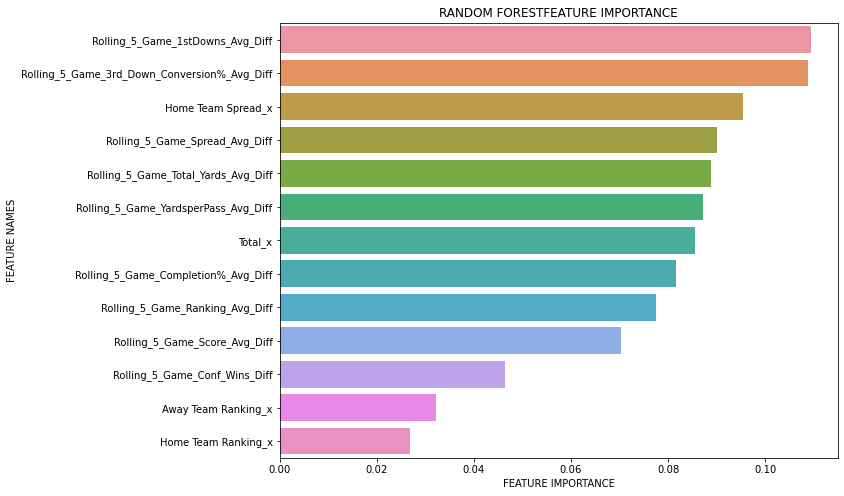

In [126]:
plot_feature_importance(RF1.feature_importances_,X_train.columns,'RANDOM FOREST')

In [128]:
RF2 = RandomForestClassifier(max_depth=6, max_leaf_nodes=30, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)

In [129]:
RF2.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=30, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)

In [130]:
y_pred=RF2.predict(X_test)

In [131]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.526     0.425     0.470       120
  H_Spread_W      0.489     0.589     0.534       112

    accuracy                          0.504       232
   macro avg      0.507     0.507     0.502       232
weighted avg      0.508     0.504     0.501       232



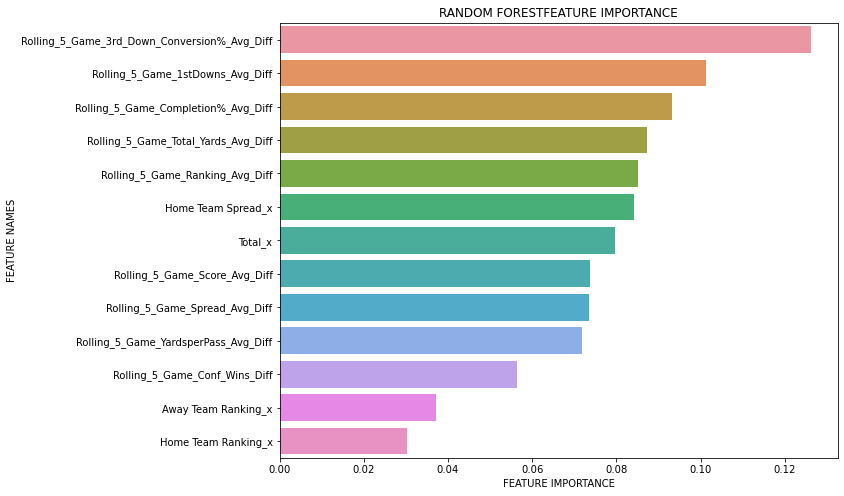

In [132]:
plot_feature_importance(RF2.feature_importances_,X_train.columns,'RANDOM FOREST')

# K NEAREST NEIGHBOR 

In [155]:
KNN = KNeighborsClassifier(n_neighbors=40)

In [156]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [157]:
y_pred= KNN.predict(X_test)

In [158]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.523     0.558     0.540       120
  H_Spread_W      0.490     0.455     0.472       112

    accuracy                          0.509       232
   macro avg      0.507     0.507     0.506       232
weighted avg      0.507     0.509     0.507       232



In [159]:
parameters = {
    'n_neighbors' : [5,9,15,21,25,31,35,41,45,51]
    
}

In [160]:
KNN = KNeighborsClassifier()

In [161]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='balanced_accuracy')
clf.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 9, 15, 21, 25, 31, 35, 41, 45, 51]},
             scoring='balanced_accuracy')

In [162]:
best_param= clf.best_params_

In [163]:
best_param

{'n_neighbors': 45}

In [164]:
KNN = KNeighborsClassifier(n_neighbors=45)

In [165]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=45)

In [166]:
y_pred=KNN.predict(X_test)

In [167]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.527     0.483     0.504       120
  H_Spread_W      0.492     0.536     0.513       112

    accuracy                          0.509       232
   macro avg      0.510     0.510     0.509       232
weighted avg      0.510     0.509     0.508       232



# Support Vector Machines Model

In [146]:
from sklearn import svm

In [168]:
clf = svm.SVC()

In [169]:
clf.fit(X_train, y_train)

SVC()

In [170]:
y_pred = clf.predict(X_test)


In [171]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.540     0.508     0.524       120
  H_Spread_W      0.504     0.536     0.519       112

    accuracy                          0.522       232
   macro avg      0.522     0.522     0.522       232
weighted avg      0.523     0.522     0.522       232



# Home / Away Winner Modeling Prep

In [220]:
df3.columns

Index(['Date', 'Year', 'Home Team', 'Home Team Ranking_x', 'Away Team',
       'Away Team Ranking_x', 'Home Team Spread_x', 'Away Team Spread_x',
       'Total_x', 'Home Score_x_x',
       ...
       'Rolling 5 Past H&A Push Odds_Away_Team',
       'Rolling 5 Past H&A Push Odds Avg_Away_Team',
       'Rolling 5 Past H&A Push Odds Max_Away_Team',
       'Rolling 5 Past H&A Push Odds Min_Away_Team',
       'Rolling 3 Past H&A Push Odds_Away_Team',
       'Rolling 3 Past H&A Push Oddss Avg_Away_Team',
       'Rolling 3 Past H&A Push OddsMax_Away_Team',
       'Rolling 3 Past H&A Push Odds Min_Away_Team',
       'Previous H&A Push Odds_Away_Team', 'H Spread Outcome'],
      dtype='object', length=1594)

In [221]:
df3.shape

(976, 1594)

In [224]:
df5 = df3[Home_High_Corr_Values]

In [225]:
df5.shape

(976, 40)

In [226]:
df5['Rolling_5_Game_Score_Avg_Diff'] = df5['Rolling 5 Past H&A Score Avg_Away_Team'] - df5['Rolling 5 Past H&A Score Avg_Home_Team']

df5['Rolling_5_Game_1stDowns_Avg_Diff'] = df5['Rolling 5 Past H&A 1st Downs Avg_Away_Team'] - df5['Rolling 5 Past H&A 1st Downs Avg_Home_Team']

df5['Rolling_5_Game_Total_Yards_Avg_Diff'] = df5['Rolling 5 Past H&A Total Yards Avg_Away_Team'] - df5['Rolling 5 Past H&A Total Yards Avg_Home_Team']

df5['Rolling_5_Game_YardsperPass_Avg_Diff'] = df5['Rolling 5 Past H&A Yards per Pass Avg_Away_Team'] - df5['Rolling 5 Past H&A Yards per Pass Avg_Home_Team']

df5['Rolling_5_Game_Spread_Avg_Diff'] = df5['Rolling 5 Past H&A Spread Avg_Away_Team'] - df5['Rolling 5 Past H&A Spread Avg_Home_Team']

df5['Rolling_5_Game_Conf_Wins_Diff'] = df5['Rolling 5 Past H&A Conf T Wins_Away_Team'] - df5['Rolling 5 Past H&A Conf T Wins_Home_Team']

df5['Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff'] = df5['Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team'] - df5['Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team']

df5['Rolling_5_Game_Completion%_Avg_Diff'] = df5['Rolling 5 Past H&A Completion % Avg_Away_Team'] - df5['Rolling 5 Past H&A Completion % Avg_Home_Team']

df5['Rolling_5_Game_Ranking_Avg_Diff'] = df5['Rolling 5 Past H&A Ranking Avg_Away_Team'] - df5['Rolling 5 Past H&A Ranking Avg_Home_Team']



<ipython-input-226-59813a3b8efe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Rolling_5_Game_Score_Avg_Diff'] = df5['Rolling 5 Past H&A Score Avg_Away_Team'] - df5['Rolling 5 Past H&A Score Avg_Home_Team']
<ipython-input-226-59813a3b8efe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Rolling_5_Game_1stDowns_Avg_Diff'] = df5['Rolling 5 Past H&A 1st Downs Avg_Away_Team'] - df5['Rolling 5 Past H&A 1st Downs Avg_Home_Team']
<ipython-input-226-59813a3b8efe>:5: SettingWithCopyWarning: 
A value is

In [227]:
df5.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Year,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff
1,6.5,-6.5,49.0,41.0,37.4,23.6,496.8,9.86,-22.3,-29.0,...,2021,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8
2,6.5,-6.5,27.0,27.0,22.8,20.0,358.2,6.18,11.1,2.0,...,2021,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6
3,19.5,-19.5,55.5,22.0,24.6,22.2,399.6,7.70,-1.3,-7.0,...,2021,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4
4,31.5,-31.5,63.5,21.0,17.6,16.2,313.8,6.28,22.5,16.0,...,2021,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,2021,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2


In [228]:
df5.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg

In [229]:
df5['H/A Winner'] = df5.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] else ('Away' if x['Away Score_x_x'] > x['Home Score_x_x'] else ""),axis=1)

<ipython-input-229-6d60a34754ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['H/A Winner'] = df5.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] else ('Away' if x['Away Score_x_x'] > x['Home Score_x_x'] else ""),axis=1)


In [230]:
df5.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,H/A Winner
1,6.5,-6.5,49.0,41.0,37.4,23.6,496.8,9.86,-22.3,-29.0,...,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8,Home
2,6.5,-6.5,27.0,27.0,22.8,20.0,358.2,6.18,11.1,2.0,...,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6,Home
3,19.5,-19.5,55.5,22.0,24.6,22.2,399.6,7.70,-1.3,-7.0,...,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4,Away
4,31.5,-31.5,63.5,21.0,17.6,16.2,313.8,6.28,22.5,16.0,...,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0,Away
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2,Home


In [231]:
df6 = df5[[
               'Home Team Spread_x',
               'Total_x',
               'Rolling_5_Game_Score_Avg_Diff',
               'Rolling_5_Game_1stDowns_Avg_Diff',
               'Rolling_5_Game_Total_Yards_Avg_Diff',
               'Rolling_5_Game_YardsperPass_Avg_Diff',
               'Rolling_5_Game_Spread_Avg_Diff',
               'Rolling_5_Game_Conf_Wins_Diff',
               'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff',
               'Rolling_5_Game_Completion%_Avg_Diff',
               'Rolling_5_Game_Ranking_Avg_Diff',
               'Away Team Ranking_x',
               'Home Team Ranking_x',
               'H/A Winner'
    
]]

In [232]:
df6.head()

,Home Team Spread_x,Total_x,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,Away Team Ranking_x,Home Team Ranking_x,H/A Winner
1,6.5,49.0,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8,1,3,Home
2,6.5,27.0,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6,15,99,Home
3,19.5,55.5,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4,3,99,Away
4,31.5,63.5,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0,99,99,Away
5,-14.5,63.0,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2,99,25,Home


In [233]:
df6.shape

(976, 14)

In [234]:
df6.isnull().sum()

Home Team Spread_x                               0
Total_x                                          0
Rolling_5_Game_Score_Avg_Diff                   38
Rolling_5_Game_1stDowns_Avg_Diff                48
Rolling_5_Game_Total_Yards_Avg_Diff             48
Rolling_5_Game_YardsperPass_Avg_Diff            48
Rolling_5_Game_Spread_Avg_Diff                  38
Rolling_5_Game_Conf_Wins_Diff                   38
Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff    48
Rolling_5_Game_Completion%_Avg_Diff             48
Rolling_5_Game_Ranking_Avg_Diff                 38
Away Team Ranking_x                              0
Home Team Ranking_x                              0
H/A Winner                                       0
dtype: int64

In [235]:
df6 = df6.dropna()

In [236]:
df6.shape

(928, 14)

In [238]:

y = df6['H/A Winner']
X = df6.drop('H/A Winner',axis=1)

In [239]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# H/A Winner Modeling

# DT - Entropy

In [252]:

entr_model= tree.DecisionTreeClassifier(criterion="entropy")

entr_model.fit(X_train,y_train)


y_pred = entr_model.predict(X_test)


y_pred = pd.Series(y_pred)


entr_model

DecisionTreeClassifier(criterion='entropy')

In [253]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.630     0.607     0.618       112
        Home      0.645     0.667     0.656       120

    accuracy                          0.638       232
   macro avg      0.637     0.637     0.637       232
weighted avg      0.638     0.638     0.638       232



[Text(2381.232558139535, 1009.5428571428572, 'Home Team Spread_x <= -2.75\nentropy = 0.989\nsamples = 696\nvalue = [306, 390]'),
 Text(1128.9767441860465, 854.2285714285715, 'Home Team Spread_x <= -14.75\nentropy = 0.69\nsamples = 368\nvalue = [68, 300]'),
 Text(519.0697674418604, 698.9142857142858, 'Total_x <= 65.25\nentropy = 0.248\nsamples = 121\nvalue = [5, 116]'),
 Text(311.4418604651163, 543.6, 'Rolling_5_Game_Completion%_Avg_Diff <= -0.095\nentropy = 0.131\nsamples = 110\nvalue = [2, 108]'),
 Text(207.62790697674419, 388.28571428571433, 'Rolling_5_Game_Total_Yards_Avg_Diff <= -87.6\nentropy = 0.316\nsamples = 35\nvalue = [2, 33]'),
 Text(103.81395348837209, 232.97142857142865, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(311.4418604651163, 232.97142857142865, 'Rolling_5_Game_1stDowns_Avg_Diff <= -2.9\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(207.62790697674419, 77.65714285714284, '\n  (...)  \n'),
 Text(415.25581395348837, 77.65714285714284, '\n  (...)  \n

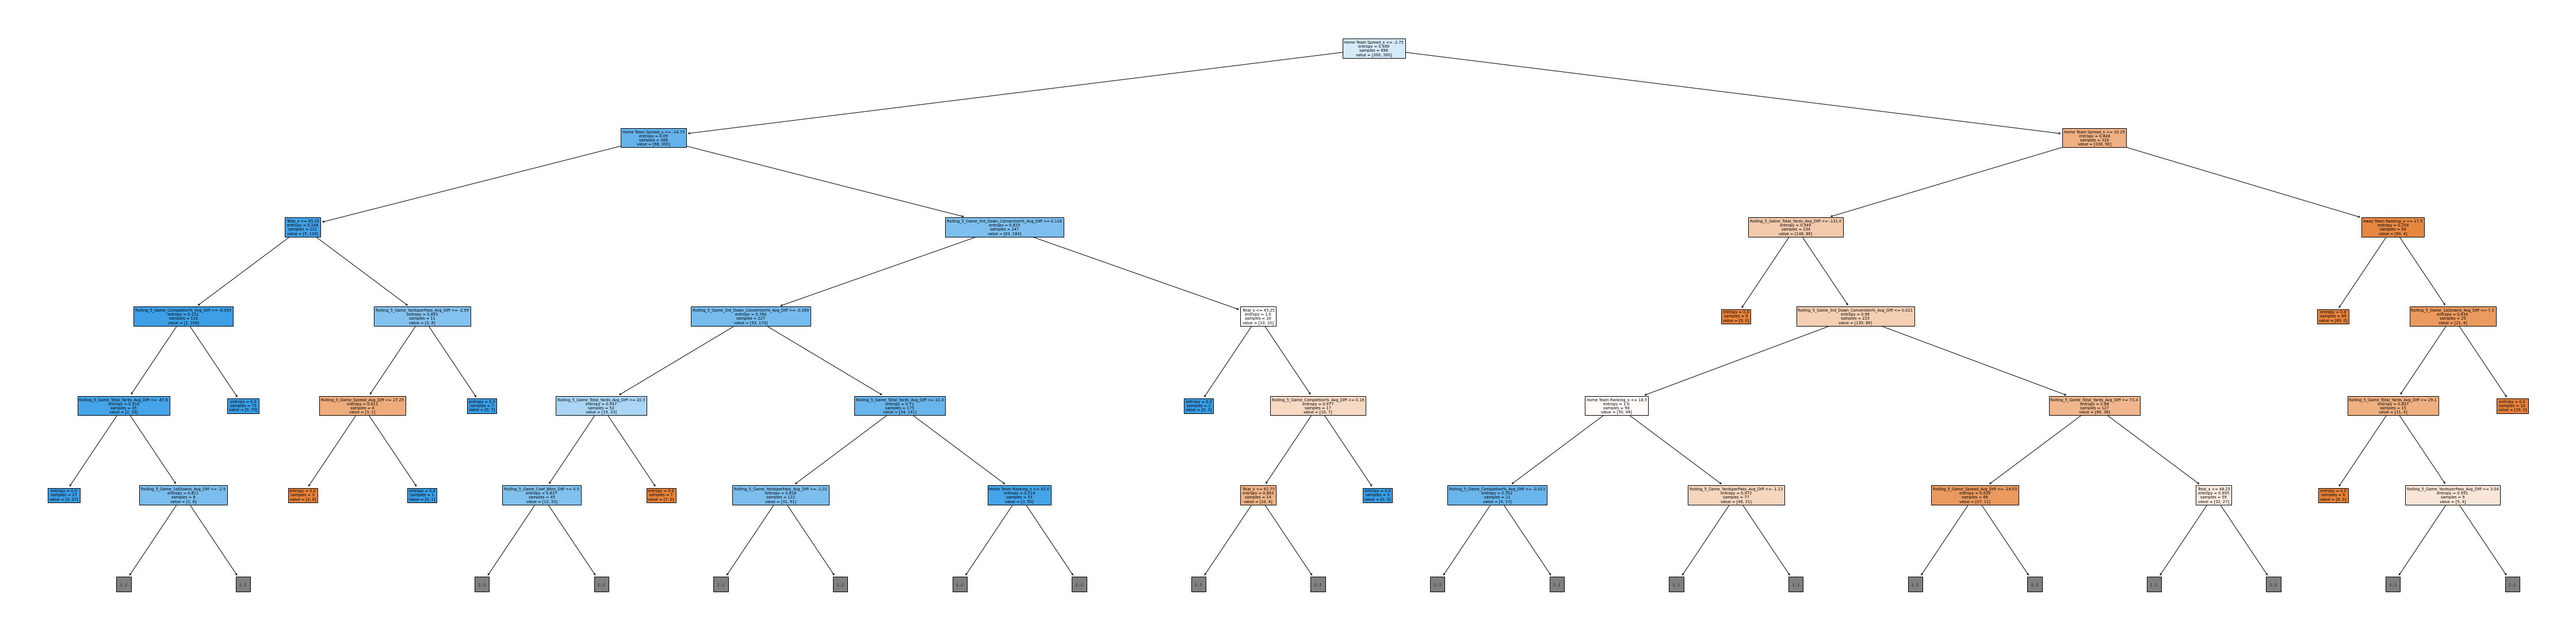

In [258]:
plt.figure(figsize=(80,20))
plot_tree(entr_model,feature_names=X_train.columns,max_depth=5,filled=True)

13

# Model 2 - Gini

In [242]:

gini_model= tree.DecisionTreeClassifier(criterion="gini")

gini_model.fit(X_train,y_train)


y_pred = gini_model.predict(X_test)


y_pred = pd.Series(y_pred)


gini_model

DecisionTreeClassifier()

In [243]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.641     0.589     0.614       112
        Home      0.643     0.692     0.667       120

    accuracy                          0.642       232
   macro avg      0.642     0.640     0.640       232
weighted avg      0.642     0.642     0.641       232



# DT Param GridSearch

In [244]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,3,5,10],
    'max_features' : [5,6,7,8,9,10,11,12,13]
}

In [245]:
DT = DecisionTreeClassifier()

In [246]:
clf = GridSearchCV(DT,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']})

In [247]:
best_params = clf.best_params_

In [248]:
best_params

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 3,
 'splitter': 'best'}

# DT_Best_Params

In [249]:
DT = DecisionTreeClassifier(**best_params)

In [250]:
DT.fit(X_train,y_train)


y_pred = DT.predict(X_test)


y_pred = pd.Series(y_pred)


print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.698     0.723     0.711       112
        Home      0.733     0.708     0.720       120

    accuracy                          0.716       232
   macro avg      0.716     0.716     0.715       232
weighted avg      0.716     0.716     0.716       232



[Text(2232.0, 906.0, 'Home Team Spread_x <= -2.75\ngini = 0.493\nsamples = 696\nvalue = [306, 390]'),
 Text(1116.0, 543.6, 'Home Team Spread_x <= -14.75\ngini = 0.301\nsamples = 368\nvalue = [68, 300]'),
 Text(558.0, 181.19999999999993, 'gini = 0.079\nsamples = 121\nvalue = [5, 116]'),
 Text(1674.0, 181.19999999999993, 'gini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(3348.0, 543.6, 'Home Team Spread_x <= 10.25\ngini = 0.398\nsamples = 328\nvalue = [238, 90]'),
 Text(2790.0, 181.19999999999993, 'gini = 0.465\nsamples = 234\nvalue = [148, 86]'),
 Text(3906.0, 181.19999999999993, 'gini = 0.081\nsamples = 94\nvalue = [90, 4]')]

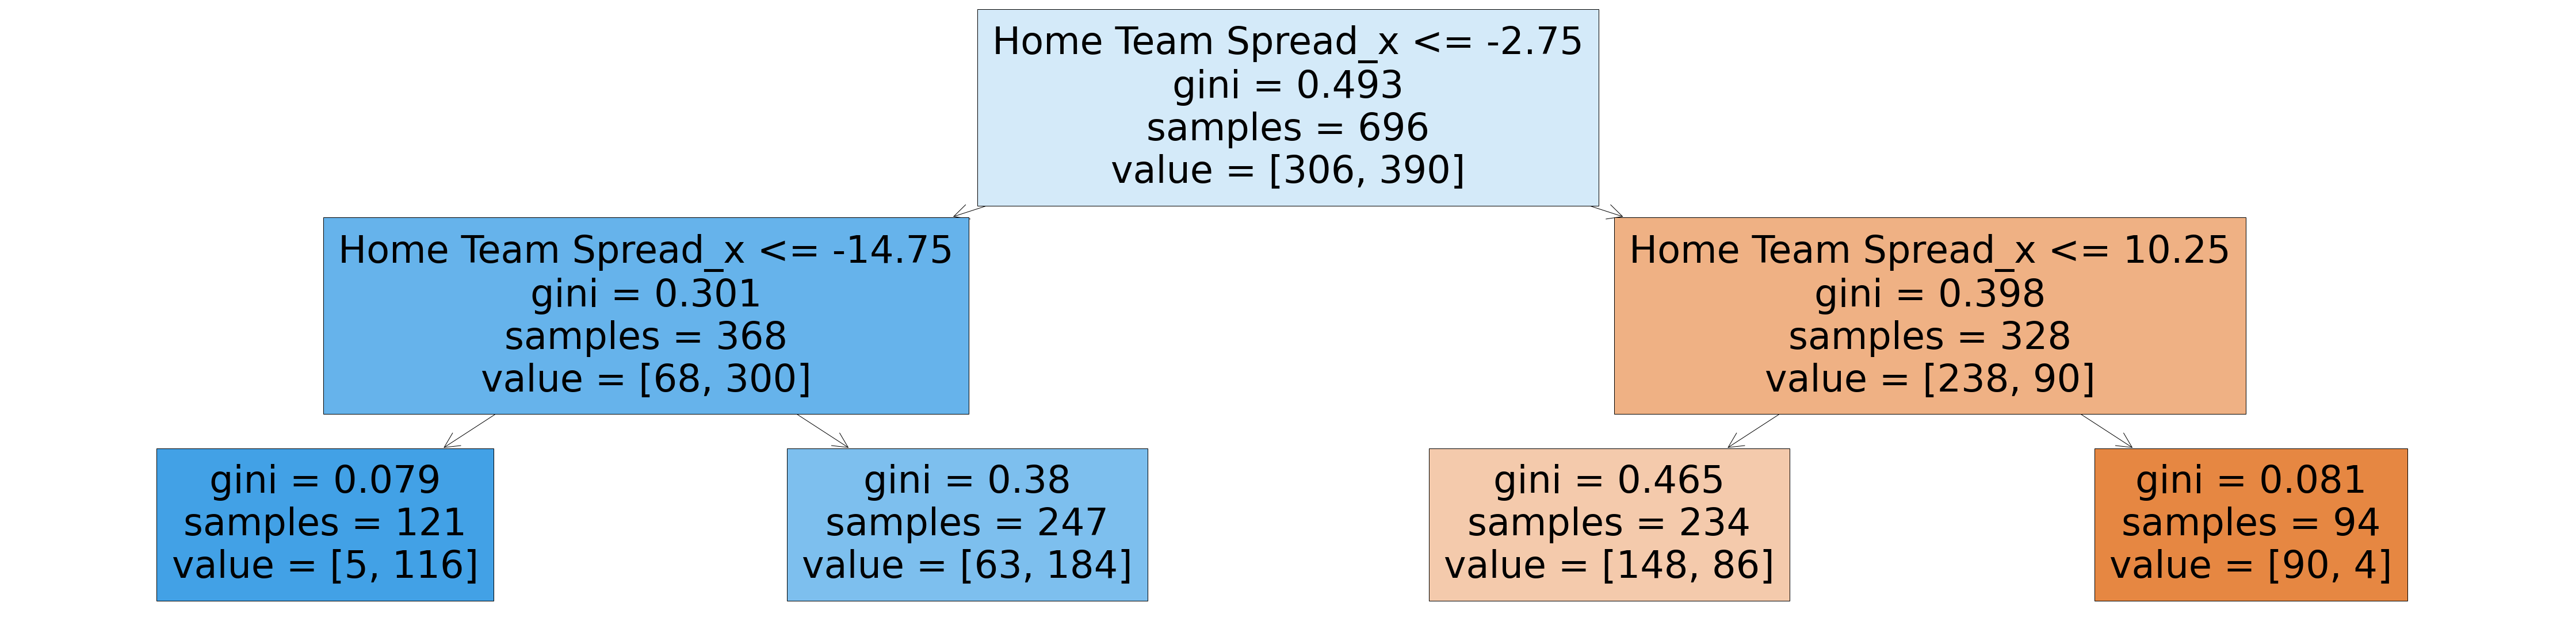

In [251]:
plt.figure(figsize=(80,20))
plot_tree(DT,feature_names=X_train.columns,max_depth=3,filled=True)

# H/A Winner Random Forrest

In [259]:
firstRFModel = RandomForestClassifier()
firstRFModel.fit(X_train, y_train)



y_pred = firstRFModel.predict(X_test)
y_pred = pd.Series(y_pred)


In [260]:

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.725     0.705     0.715       112
        Home      0.732     0.750     0.741       120

    accuracy                          0.728       232
   macro avg      0.728     0.728     0.728       232
weighted avg      0.728     0.728     0.728       232



In [261]:
[estimator.tree_.max_depth for estimator in firstRFModel.estimators_]

[13,
 17,
 15,
 17,
 13,
 15,
 14,
 14,
 12,
 19,
 12,
 15,
 11,
 15,
 16,
 13,
 19,
 21,
 14,
 13,
 14,
 14,
 17,
 17,
 20,
 18,
 17,
 16,
 21,
 15,
 14,
 15,
 17,
 16,
 18,
 15,
 15,
 14,
 14,
 15,
 16,
 19,
 15,
 14,
 13,
 13,
 14,
 15,
 13,
 15,
 12,
 16,
 13,
 14,
 15,
 14,
 16,
 18,
 12,
 17,
 14,
 14,
 14,
 13,
 15,
 16,
 13,
 17,
 14,
 21,
 16,
 17,
 14,
 15,
 13,
 14,
 13,
 16,
 13,
 14,
 16,
 17,
 15,
 14,
 21,
 14,
 11,
 13,
 13,
 18,
 17,
 18,
 15,
 17,
 16,
 15,
 16,
 14,
 14,
 15]

# RF GridSearch

In [265]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [10,15,20],
    'min_samples_split':[5,10,15],
    'min_samples_leaf': [3,10,20],
    'max_leaf_nodes': [20,30,50]
    
}

In [266]:
RF = RandomForestClassifier()

In [267]:
clf = GridSearchCV(RF,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20],
                         'max_leaf_nodes': [20, 30, 50],
                         'min_samples_leaf': [3, 10, 20],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 150]})

In [269]:
best_params = clf.best_params_

In [270]:
best_params

{'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 150}

# RF Model 2 - Best Params

In [271]:
RF = RandomForestClassifier(**best_params)

In [272]:
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.736     0.696     0.716       112
        Home      0.730     0.767     0.748       120

    accuracy                          0.733       232
   macro avg      0.733     0.732     0.732       232
weighted avg      0.733     0.733     0.732       232



# KNN H/A Winer Models

In [273]:
KNN = KNeighborsClassifier(n_neighbors=40)

In [274]:
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.709     0.652     0.679       112
        Home      0.698     0.750     0.723       120

    accuracy                          0.703       232
   macro avg      0.703     0.701     0.701       232
weighted avg      0.703     0.703     0.702       232



# KNN H/A Winner Gridsearch

In [283]:
KNN = KNeighborsClassifier()

In [284]:
parameters = { 'n_neighbors': [20,25,30,35,40,45,50,55,60,65]}

In [285]:
clf = GridSearchCV(KNN,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20, 25, 30, 35, 40, 45, 50, 55, 60,
                                         65]})

In [286]:
best_params= clf.best_params_
best_params

{'n_neighbors': 20}

In [287]:
parameters = { 'n_neighbors': [5,9,11,13,15,17,19,20,25,30,35,40,45,50,55,60,65]}

In [288]:
clf = GridSearchCV(KNN,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 9, 11, 13, 15, 17, 19, 20, 25, 30,
                                         35, 40, 45, 50, 55, 60, 65]})

In [289]:
best_params= clf.best_params_
best_params

{'n_neighbors': 13}

In [290]:
KNN = KNeighborsClassifier(n_neighbors=13)

In [291]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [292]:
y_pred = KNN.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.745     0.679     0.710       112
        Home      0.723     0.783     0.752       120

    accuracy                          0.733       232
   macro avg      0.734     0.731     0.731       232
weighted avg      0.734     0.733     0.732       232



In [293]:
test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


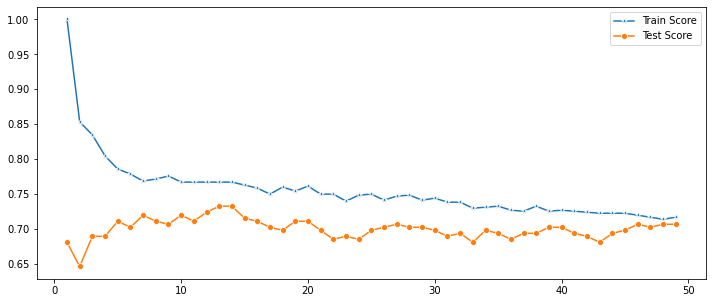

In [294]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

In [295]:
from sklearn.metrics import confusion_matrix

In [296]:
pl = confusion_matrix(y_test,y_pred)

In [297]:
print(pl)

[[76 36]
 [26 94]]


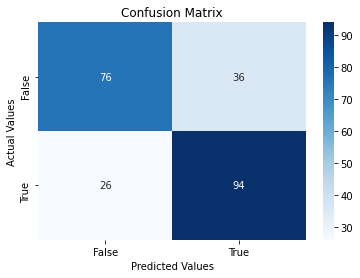

In [298]:
import seaborn as sns

ax = sns.heatmap(pl, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Support Vector Machines

In [299]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.731     0.607     0.663       112
        Home      0.683     0.792     0.734       120

    accuracy                          0.703       232
   macro avg      0.707     0.699     0.699       232
weighted avg      0.706     0.703     0.700       232



# Summary of Findings

Home Spread Predicted Outcome (Win/Lose)

The decision tree classifier model had the best f1 accuracy score of 53%. With even distribution of the actual data for the Home Team Winning & Losing the spread, this model gives a slight advantage to potential bet places as they would win the bet 53% of the time, thus make profit. While I would have liked to see this score higher, given the uncertainty of sporting event scores, this model would have to essentially predict both teams scores farily accuratley to determine whether or not the the home team would win or lose the spread - which is not an easy task. 

Home / Away Team Winner (Home/Away)

Random Forest Classifier and K Nearest Neighbors Classifier recieved similar f1 accuracy score of 73%. Choosing one, I would lean more toward Random Forest given it is a much more complex model and has many indiviudal decision trees with different variations of variables included within each tree and ultimatley takes a majority vote for the predicted outcome. However with KNN being a simpler model and having a achieved a similar score, if time was an issue or if the training dataset were to grow substantially, I would choose KNN for my final model selection. 

Final thoughts

While I am happy with these inital results, I realize that this dataset is a relatively small sample of data as it is just focused on SEC teams within the last 20 years. I believe that the results would show significant improvement by introducing much more training data. This could be achieved by including other college conferences, so in theory this dataset could grow at least 10 fold. 